## 1. Pré-processamento:

### 1.1. Bibliotecas

In [1]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.2. Seleção das informações (series) que serão incluidas na tabela para análise

Para encontrar os códigos referentes a cada indicador, basta ir em https://data.worldbank.org/indicator, selecionar o indicador e copiar o que tem escrito depois da ultima barra da url.

In [2]:
paises = ['BRA', 'ARG', 'BOL', 'CHL', 'COL', 'ECU', 'PRY', 'VEN', 'PER', 'URY', 'GUY', 'SUR']
periodo = range(2000, 2023)
indicadores = {
    "SI.POV.DDAY" : "Taxa de pobreza de US$ 3,00 por dia (%)",
    "per_allsp.cov_pop_tot": "Cobertura de programas de proteção social e trabalho (% da população)",
    "FP.CPI.TOTL.ZG": "Inflação, preços ao consumidor (% anual)"
}

df_data = wb.data.DataFrame(
    list(indicadores.keys()), 
    paises, 
    time=periodo,
    labels=True
)

df_data.head()

,,Country,Series,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,series,,,,,,,,,,,,,,,,,,,,,
SUR,SI.POV.DDAY,Suriname,Poverty headcount ratio at $3.00 a day (2021 P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
GUY,SI.POV.DDAY,Guyana,Poverty headcount ratio at $3.00 a day (2021 P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URY,SI.POV.DDAY,Uruguay,Poverty headcount ratio at $3.00 a day (2021 P...,0.8,0.7,1.1,1.5,1.7,1.5,1.0,0.7,...,0.3,0.2,0.2,0.1,0.1,0.1,0.1,0.3,0.2,0.2
PER,SI.POV.DDAY,Peru,Poverty headcount ratio at $3.00 a day (2021 P...,25.5,27.4,24.4,22.5,23.5,25.4,21.8,18.9,...,8.6,8.0,8.0,7.5,7.3,6.1,5.4,10.3,5.2,4.8
VEN,SI.POV.DDAY,"Venezuela, RB",Poverty headcount ratio at $3.00 a day (2021 P...,NaN,14.7,22.1,27.1,22.8,18.1,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3. Análise de propriedades

In [3]:
df_data.shape

(36, 25)

In [4]:
df_data.dtypes

Country     object
Series      object
YR2000     float64
YR2001     float64
YR2002     float64
YR2003     float64
YR2004     float64
YR2005     float64
YR2006     float64
YR2007     float64
YR2008     float64
YR2009     float64
YR2010     float64
YR2011     float64
YR2012     float64
YR2013     float64
YR2014     float64
YR2015     float64
YR2016     float64
YR2017     float64
YR2018     float64
YR2019     float64
YR2020     float64
YR2021     float64
YR2022     float64
dtype: object

In [5]:
df_data.columns.tolist()


['Country',
 'Series',
 'YR2000',
 'YR2001',
 'YR2002',
 'YR2003',
 'YR2004',
 'YR2005',
 'YR2006',
 'YR2007',
 'YR2008',
 'YR2009',
 'YR2010',
 'YR2011',
 'YR2012',
 'YR2013',
 'YR2014',
 'YR2015',
 'YR2016',
 'YR2017',
 'YR2018',
 'YR2019',
 'YR2020',
 'YR2021',
 'YR2022']

### 1.4. Alterar a forma de escrita dos anos

In [6]:
df_long = df_data.melt(
    id_vars=['Country', 'Series'],   
    var_name='Ano',
    value_name='Valor'
)

df_long['Ano'] = df_long['Ano'].str.replace('YR', '').astype(int)


### 1.5. Transformar wide em long

In [7]:
df_long = df_data.melt(
    id_vars=['Country', 'Series'],   
    var_name='Ano',
    value_name='Valor'
)

df_long['Ano'] = df_long['Ano'].str.replace('YR', '').astype(int)

In [8]:
df_long.dtypes

Country     object
Series      object
Ano          int64
Valor      float64
dtype: object

In [9]:
df_data = df_long.pivot_table(
    index=['Country', 'Ano'],
    columns='Series',
    values='Valor'
).reset_index()

In [10]:
df_data.head()

Series,Country,Ano,Coverage of social protection and labor programs (% of population),"Inflation, consumer prices (annual %)",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)
0,Argentina,2000,NaN,NaN,7.3
1,Argentina,2001,NaN,NaN,10.7
2,Argentina,2002,NaN,NaN,17.1
3,Argentina,2003,NaN,NaN,8.2
4,Argentina,2004,NaN,NaN,6.0


In [11]:
df_data.shape

(248, 5)

### 1.6. Tratamento de dados faltantes

In [12]:
linhas_com_nan = df_data[df_data.isna().any(axis=1)]
linhas_com_nan

Series,Country,Ano,Coverage of social protection and labor programs (% of population),"Inflation, consumer prices (annual %)",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)
0,Argentina,2000,NaN,NaN,7.3
1,Argentina,2001,NaN,NaN,10.7
2,Argentina,2002,NaN,NaN,17.1
3,Argentina,2003,NaN,NaN,8.2
4,Argentina,2004,NaN,NaN,6.0
...,...,...,...,...,...
243,"Venezuela, RB",2012,NaN,21.068996,NaN
244,"Venezuela, RB",2013,NaN,40.639428,NaN
245,"Venezuela, RB",2014,NaN,62.168650,NaN
246,"Venezuela, RB",2015,NaN,121.738085,NaN


In [13]:
df_data.isnull().sum()

Series
Country                                                                  0
Ano                                                                      0
Coverage of social protection and labor programs (% of population)     131
Inflation, consumer prices (annual %)                                   50
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)     57
dtype: int64

In [14]:
colunas_com_nulos = [
    'Coverage of social protection and labor programs (% of population)',
    'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)',
    'Inflation, consumer prices (annual %)',
]

#ordenando por país
df_data = df_data.sort_values(by=['Country', 'Ano'])

#agrupando por país e interpolando linearmente
for col in colunas_com_nulos:
    df_data[col] = df_data.groupby('Country')[col].transform(
        lambda x: x.interpolate(method='linear')
    )

In [15]:
#verificando nulos restantes
print(df_data[colunas_com_nulos].isna().sum())

Series
Coverage of social protection and labor programs (% of population)     100
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)     32
Inflation, consumer prices (annual %)                                   50
dtype: int64


In [16]:
#preenchendo os nulos restantes com a mediana da coluna
df_data[colunas_com_nulos] = df_data[colunas_com_nulos].apply(
    lambda x: x.fillna(x.median())
)

#ultima verificação
print(df_data[colunas_com_nulos].isna().sum())

Series
Coverage of social protection and labor programs (% of population)     0
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)    0
Inflation, consumer prices (annual %)                                  0
dtype: int64


In [17]:
df_data.isnull().sum()

Series
Country                                                                0
Ano                                                                    0
Coverage of social protection and labor programs (% of population)     0
Inflation, consumer prices (annual %)                                  0
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)    0
dtype: int64

In [18]:
df_data.tail()

Series,Country,Ano,Coverage of social protection and labor programs (% of population),"Inflation, consumer prices (annual %)",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)
243,"Venezuela, RB",2012,14.523409,21.068996,9.7
244,"Venezuela, RB",2013,14.523409,40.639428,9.7
245,"Venezuela, RB",2014,14.523409,62.168650,9.7
246,"Venezuela, RB",2015,14.523409,121.738085,9.7
247,"Venezuela, RB",2016,14.523409,254.948535,9.7


In [19]:
mapa_nomes = {
    'Access to electricity (% of population)': 'Acesso à Eletricidade',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)': 'Fertilidade Adolescente',
    'Current health expenditure (% of GDP)': 'Gasto com Saúde (% PIB)',
    'Fuel exports (% of merchandise exports)': 'Exportação de Combustível (%)',
    'GDP per capita (constant 2015 US$)': 'PIB per capita',
    'Life expectancy at birth, total (years)': 'Expectativa de Vida',
    'Mortality rate, under-5 (per 1,000 live births)': 'Mortalidade Infantil',
    'People using at least basic drinking water services (% of population)': 'Acesso à Água Potável',
    'People using at least basic sanitation services (% of population)': 'Acesso ao Saneamento Básico',
    'Population, total': 'População Total',
    'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)': 'Taxa de Pobreza (US$3/dia)',
    'Prevalence of undernourishment (% of population)': 'Prevalência de Desnutrição',
    'Unemployment, female (% of female labor force) (modeled ILO estimate)': 'Desemprego Feminino',
    'Unemployment, male (% of male labor force) (modeled ILO estimate)': 'Desemprego Masculino',
    'Coverage of social protection and labor programs (% of population)': 'Programas de proteção social',
    'Inflation, consumer prices (annual %)': 'Inflação (% anual)'
}

df_data = df_data.rename(columns=mapa_nomes)

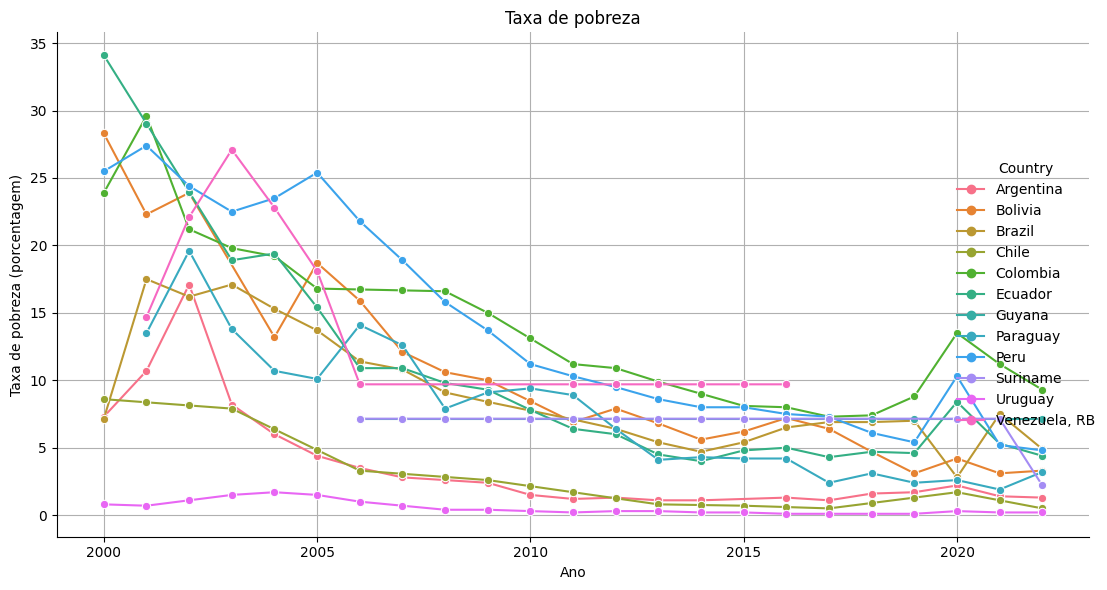

In [20]:
g = sns.relplot(
    data=df_data,
    x='Ano',
    y='Taxa de Pobreza (US$3/dia)', 
    hue='Country',
    kind='line',   
    marker='o',
    height=6,       
    aspect=1.6
)

g.set_axis_labels('Ano', 'Taxa de pobreza (porcentagem)') 
g.ax.set_title('Taxa de pobreza') 
g.ax.grid(True)

plt.tight_layout()
plt.savefig('../../reports/figures/taxa_de_pobreza.png', bbox_inches='tight')
plt.show()

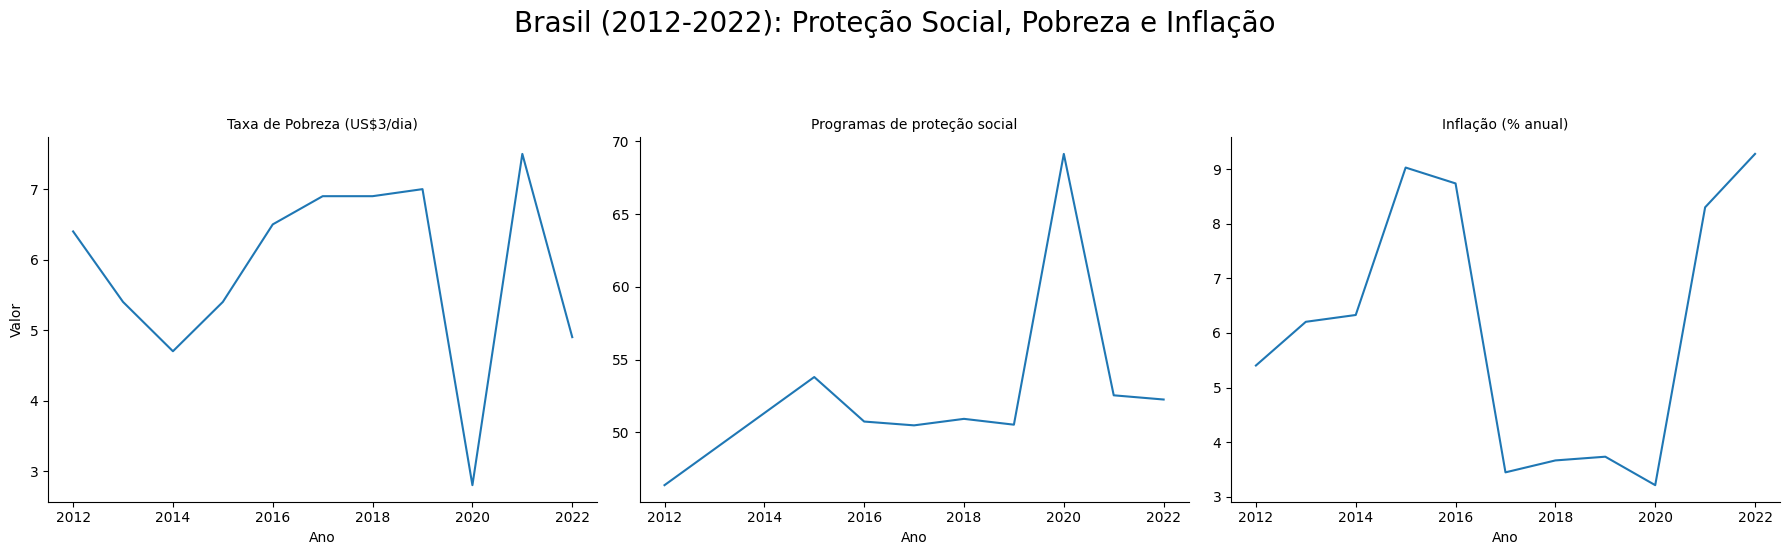

In [21]:

df_long['Métrica'] = df_long['Series'].map(mapa_nomes)


df_plot = df_long[
    (df_long['Country'] == 'Brazil') &
    (df_long['Ano'].between(2012, 2022)) &
    
    (df_long['Métrica'].isin([
        'Programas de proteção social',
        'Taxa de Pobreza (US$3/dia)',
        'Inflação (% anual)'
    ]))
]

g = sns.relplot(
    data=df_plot,
    x='Ano',
    y='Valor',       
    col='Métrica',    
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False} 
)

g.set_titles("{col_name}", size=10) 
g.fig.suptitle('Brasil (2012-2022): Proteção Social, Pobreza e Inflação', y=1.1, fontsize=20)
plt.tight_layout()
plt.savefig('../../reports/figures/analise_brasil_pobreza.png', bbox_inches='tight')
plt.show()